In [1]:
import stellar_wind as sw
import sigma_data as sd
import math 
import numpy as np
import matplotlib.pyplot as plt
 

In [6]:
#H2 data needs be in the same notebook 
data = []
for line in open("H2 data"):
    fields = [float(s) for s in line.split()]
    
    data.append(fields)

In [7]:
#generate one photon at a time track this photon and record the information 
#contiune with process n times 
#tack one photon then put this into a larger for loop to track multiple photons 
def tracking (counter,energy,starting_point,v,out_file=None):

    
        
#energy = 1E-2 #intial energy
#starting_point = 1.5E12*np.array([1,0,0])
    x = starting_point #x is where the photon is
    pol_fraction = 0 #intial polarization fraction
    pol_vector = np.array([1,0,0]) 
    weight=1
#v = np.random.random()*np.array([1,1,0]) #v is the varible name for the random direction 
# should i change this to a while loop and have it run till staus is not 1
    for index in range(5):
    
    
        
        
        sigma = sd.interpolated_data(data,energy)
        
    
        n_lambda = 1E-4 * -math.log(np.random.random())
        h = .033 #intail step length
        integralnew,x,status = sw.Integrating(h,n_lambda,v,x,sigma,energy)
        if out_file is not None:
            
            out_file.write('%d %g %g %g %g %g %g %g %g %g %g %g %g %d \n'%(counter,energy,x[0],x[1],x[2],v[0],v[1],v[2],pol_vector[0],pol_vector[1],pol_vector[2],pol_fraction,weight,status))
        if status == 1:
            pol_vector,energy,pol_fraction,v,w_prime,psi,psi_prime,theta = sw.compton_scattering(v,pol_vector,pol_fraction,energy,vnew=None)
            
            weight=weight*w_prime
            
        else :
            break 
        
    
    #energy_list.append(energy)
    #v_list.append(v)
    #pol_fraction_list.append(pol_fraction)
    
    
    
    return energy,x,v, weight 
    
    

In [9]:

out_file = open("data/tracking.txt",'w')
out_file.write(("# counter energy x[0] x[1] x[2] v[0] v[1] v[2] pol_vector[0] pol_vector[1] pol_vector[2] pol_fraction w_prime status\n"))
energy = 1E-2 #intial energy
starting_point = 1.5E12*np.array([1,0,0])

for counter in range(100):
    v = sw.getv()
    tracking(counter,energy,starting_point,v,out_file)
out_file.close()

In [7]:
#picking where the obsever will be

phi_observer=np.pi/2
theta_observer=np.pi/4
v_observer=np.array([np.cos(phi_observer)*np.sin(theta_observer),np.sin(phi_observer)*np.sin(theta_observer),np.cos(phi_observer)])
new_out_file= open("data/escaped.txt",'w')
new_out_file.write("# counter polar_theta polar_phi\n")
#new_out_file.write('%d %g %g  \n'%(counter, polar_theta, polar_phi))

for line in open("data/tracking.txt"):
    line=line.strip()
    fields=line.split(line)
    if len(line)==0 or line[0]=='#':
        continue 
    if int(fields[13])==3:
#chane x vector to polar coordinates
        #polar_phi=np.arctan(np.sqrt(v[0]**2+v[1]**2)/v[2])
        #polar_theta=np.arctan(v[1]/v[0])
        v=np.array([fields[5],fields[6],fields[7]])
#picking what we want theta and phi to be inbetween so that the photons are in the cone
        test_in_cone=np.arccos(np.dot(v,v_observer) )
        if test_in_cone < 5 and test_in_cone > 0 :
            new_out_file.write(line)
        
        #calculating stokes paremters 
        z_hat=np.array([0,0,1]) #where the star is in the z direction
        pol_vector=np.array([fields[8],fields[9],fields[10]])
        pol_fraction=fields[11]
        x_tilde=np.cross(z_hat,v_obsever)/sw.length(np.cross(z_hat,v_obsever))
        y_tilde=np.cross(v_observer,x_tilde)/sw.length(np.cross(v_observer,x_tilde))
        psi_observer=np.arccos(np.dot(pol_vector,x_tilde)/sw.length(pol_vector,x_tilde))
        I_stoke=weight
        Q_stoke=weight*pol_fraction*np.cos(2*psi_observer)
        U_stoke=-weight*pol_fraction*np.sin(2*psi_observer)
        
        #adding the stokes parameters 
        I_stoke+=I_stoke
        Q_stoke+=Q_stoke
        U_stoke+=U_stoke
        
        
    
#dot product between v of observer and v of photon will tell his the angle between photon and observer to make sure 
#we are in the cone
     #should this be a if stament ??/should this be before                
        
    
    




IndexError: list index out of range

In [10]:
def read_data(theta_observer,phi_observer):
    #phi_observer=np.pi/2
    #theta_observer=np.pi/4
    #creat empty lists
    
    number_of_escaped=0
    number_of_absorbed=0
    number_of_scattered=0
    v_observer=np.array([np.cos(phi_observer)*np.sin(theta_observer),np.sin(phi_observer)*np.sin(theta_observer),np.cos(phi_observer)])
    
    primary_energy = None
    last_index = None
    
    data = []
    for line in open("data/tracking.txt"):
        line=line.strip()
        fields=line.split()
    
        if len(line)==0 or line[0]=='#':
            continue 
        counter = int(fields[0])
        energy=float(fields[1])
        if counter != last_index:
            primary_energy =  energy
            last_index = counter
        if int(fields[13])==2:
            number_of_absorbed+=1
        if int(fields[13])==1:
            number_of_scattered+=1
        if int(fields[13])==3:
            number_of_escaped+=1
            fields = [float(x) for x in fields]
        
            
            v=np.array([fields[5],fields[6],fields[7]])
            v /= sw.length(v)
#picking what we want theta and phi to be inbetween so that the photons are in the cone
            #print(v)
            test_in_cone=np.arccos(np.dot(v,v_observer) )
            
            
            if test_in_cone < 90*np.pi/180 and test_in_cone > 0:
                
             #calculating stokes paremters 
                weight=fields[12]
                
                
                z_hat=np.array([0,0,1] , dtype = float) #where the star is in the z direction
                pol_vector=np.array([fields[8],fields[9],fields[10]])
                pol_fraction=fields[11]
                x_tilde=np.cross(z_hat,v_observer)/sw.length(np.cross(z_hat,v_observer))
                y_tilde=np.cross(v_observer,x_tilde)/sw.length(np.cross(v_observer,x_tilde))
            
                psi_observer=np.arccos(np.dot(pol_vector,x_tilde)/(sw.length(pol_vector)*sw.length(x_tilde)))
                #print(np.dot(pol_vector,x_tilde)/(sw.length(pol_vector)*sw.length(x_tilde)))
                I_stoke=weight
                Q_stoke=weight*pol_fraction*np.cos(2*psi_observer)
                U_stoke=weight*pol_fraction*np.sin(2*psi_observer)    
                data.append([counter,primary_energy,energy,v,weight,pol_vector,pol_fraction,psi_observer,I_stoke,Q_stoke,U_stoke]) 
                
                    #number_of_escaped,number_of_absorbed,number_of_scattered,stokesI,stokesU,stokesQ 
                    
    return  data             
    
    

0.26493
-8.248962946306094e-31
3.6137762279840725e-31


(array([42.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([0.      , 0.026493, 0.052986, 0.079479, 0.105972, 0.132465,
        0.158958, 0.185451, 0.211944, 0.238437, 0.26493 ]),
 <a list of 10 Patch objects>)

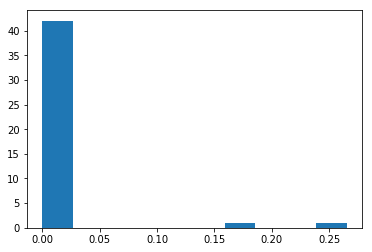

In [12]:
phi_observer = np.pi/2
theta_observer = np.pi/4
data = read_data(theta_observer,phi_observer)
#print(data)
max_pol_fraction = 0.
len(data)
stokesI = 0.
stokesQ = 0.
stokesU = 0.
pol_fraction=[]    
for line in data:
    
    stokesI += line[8]
    stokesQ += line[9]
    stokesU += line[10]
    pol_fraction.append(line[6])
    if line[6] > max_pol_fraction:
        max_pol_fraction=line[6]
print(max_pol_fraction)
print(stokesU/stokesI)
print(stokesQ/stokesI)
    
   
       
                
plt.hist(pol_fraction, 10, density=False)
#plt.hist(scattered, 1, density=True)
#plt.hist(absorbed, 1, density=True)
                
                
                
                
            
        

In [11]:
#plot histogram of each of the stokes vectors ??
phi_observer=np.pi/2
theta_observer=np.pi/4
for index in range(100):
    
    I_stoke,Q_stoke,U_stoke,weight,number_of_escaped = cone_plots(theta_observer,phi_observer)
    I_stoke+=I_stoke
    Q_stoke+=Q_stoke
    U_stoke+=U_stoke
    


NameError: name 'cone_plots' is not defined

In [7]:
def histogram_pol_fraction():
    x=[]
    for line in open("data/tracking.txt"):
        if len(line)==0 or line[0]=="#":
            continue 
        #if line[0] == 
        field =line.split()
        pol_frac = float(field[11])
        x.append(pol_frac)
        
        #print(x)
    plt.hist(x,8)
    plt.show()

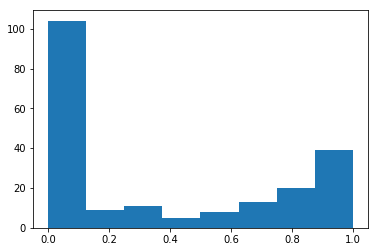

In [8]:
histogram_pol_fraction()

In [9]:
#to plot the photon 
photon_data=[]
for line in open("tracking.txt"):
    counter = int(fields[0])
    if len(line)==0
        continue 
        

SyntaxError: invalid syntax (<ipython-input-9-a6d2f650c735>, line 5)

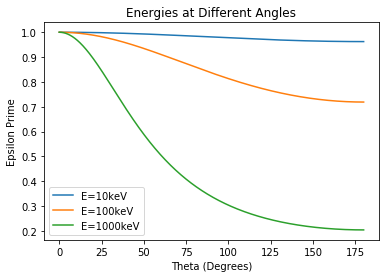

In [2]:
#energy=np.random.rand(5)*2E-3
for energy in [1E-2,1E-1,1] :
#energy=2.4E-1
    me=.511 #MeV
    epsilon=energy/(me)
    THETA=np.linspace(0,math.pi,1000)
    x=np.cos(THETA)

    y=sw.compton_formula(THETA,epsilon)/epsilon

#print(x)
#print(y)
    
    plt.plot((THETA*180/math.pi),y,label="E=%dkeV"%(1000*energy))
plt.legend(loc="lower left")
plt.ylabel('Epsilon Prime')
plt.xlabel('Theta (Degrees)')
plt.title('Energies at Different Angles')
plt.show()

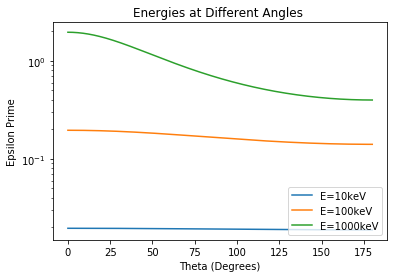

In [3]:
#y axis is on a log scale
#energy=np.random.rand(5)*2E-3
for energy in [1E-2,1E-1,1] :
#energy=2.4E-1
    me=.511 #MeV
    epsilon=energy/(me)
    THETA=np.linspace(0,math.pi,1000)
    x=np.cos(THETA)

    y=sw.compton_formula(THETA,epsilon)

#print(x)
#print(y)
    
    plt.plot((THETA*180/math.pi),y,label="E=%dkeV"%(1000*energy))
plt.legend(loc="lower right")
plt.ylabel('Epsilon Prime')
plt.xlabel('Theta (Degrees)')
plt.yscale('log')
plt.title('Energies at Different Angles ')
plt.show()

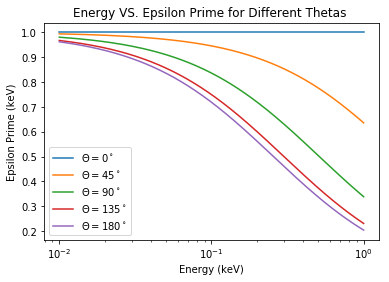

In [12]:
#energy=np.random.rand(5)*2E-3
for THETA in [0,math.pi/4,math.pi/2,3*math.pi/4,math.pi] :
    energy=np.linspace(.01,1,1000)
    me=.511 #MeV
    epsilon=energy/(me)
    
    

    y=sw.compton_formula(THETA,epsilon)/epsilon

#print(x)
#print(y)
    
    plt.plot((energy),y,label=r'$\Theta=%d^\circ$'%(THETA*180/math.pi))
plt.legend(loc="lower left")
plt.ylabel('Epsilon Prime (keV)')
plt.xlabel('Energy (MeV)')
plt.title('Energy VS. Epsilon Prime for Different Thetas ')
plt.xscale('log')
plt.show()

Text(0.5, 1.0, 'Theta VS. Polarization Fraction for Different Energies')

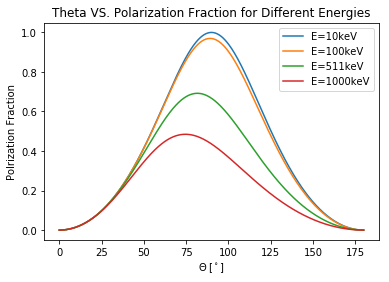

In [2]:
for energy in [1E-2,1E-1,.511,1] :
    pol_f=[]
    Thetas=np.linspace(0,np.pi,1000)
    for theta in Thetas:
        pol_f.append(sw.compton_graphing(theta,energy))
    
        
        
    plt.plot(Thetas*180/np.pi,np.array(pol_f),label="E=%dkeV"%(1000*energy))             
plt.ylabel('Polrization Fraction')
plt.xlabel(r'$\Theta\;[^\circ]$')
plt.legend(loc="upper right")
plt.title('Theta VS. Polarization Fraction for Different Energies')


Text(0.5, 1.0, 'Theta VS. Weight for Diffrent Energies')

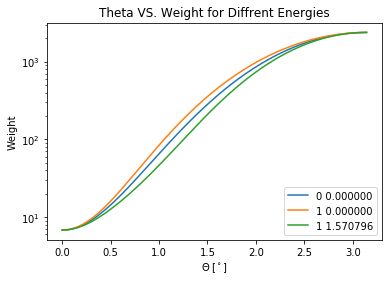

In [6]:
energy=2
for p,psi in [(0,0),(1,0),(1,np.pi/2)]:
    Thetas=np.linspace(0,np.pi,1000)
    weight=[]
    for theta in Thetas:
        weight.append(sw.weight_prime(energy,theta,psi,p))
    plt.plot(Thetas,np.array(weight),label="%d %f"%(p,psi))
plt.legend(loc='lower right')
plt.yscale('log')
plt.ylabel('Weight')
plt.xlabel(r'$\Theta\;[^\circ]$')
plt.title('Theta VS. Weight for Diffrent Energies')

In [7]:
pol_fraction=0
pol_vector=np.zeros(3)
v=3e10*np.array([1,0,0])
Psi=[]
Psi_prime=[]
for energy in [1E-2,1E-1,.511,1] :
    
    pol_vector,energy,pol_fraction,v,w_prime,psi,psi_prime=sw.compton_scattering(v,pol_vector,pol_fraction,energy)
    print("psi=",psi)
    print("psi_prime=",psi_prime)
    Psi.append(psi)
    Psi_prime.append(psi_prime)
    plt.plot(Psi,Psi_prime)

stokes= [ 1. -0.  0.]
stokes_prime= [6.33400152e-30 1.68139228e-30 0.00000000e+00]


ValueError: too many values to unpack (expected 7)

In [ ]:
#one photon 
#polirazation fraction = 0
#pick a radnom direction
#1.5 times the star radius for starting point 
#track photon till 10 times star radius
energy=1
pol_fraction = 0
v=np.random.random()*np.array([1,1,0])
starting_point=1.5E12*np.array([1,0,0])
integralnew,x,status =sw.Integrating(h,n_lambda,v,x)


In [9]:
psi=45*np.pi/180
f= np.array([0,np.cos(psi),np.sin(psi)])
pol_vector,energy,pol_fraction,v,w_prime,psi,psi_prime,theta=sw.compton_scattering(np.array([1,0,0]),
                                                                             f,
                                                                             1,.1,np.array([.707,0,-.707]))
print(psi*180/np.pi)
print(psi_prime*180/np.pi)
print(pol_vector)
print(sw.length(pol_vector))
print(np.arccos(np.dot(f,pol_vector))*180/np.pi)
print(theta*180/np.pi)

stokes= [ 1.000000e+00  6.123234e-17 -1.000000e+00]
stokes_prime= [ 6.67195195e-30  2.21938657e-30 -6.27737319e-30]
45.0
35.264389682754654
[0.40820719 0.81653768 0.40820719]
1.0
30.00000025148028
45.0
